In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("datasets/full_data/data_90457_1562039922.327703_thomas.csv")

In [4]:
df.head()

,Leap timestamp,timestamp diff,emg timestamp,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Wrist x,Wrist y,Wrist z,Thumb Proximal x,Thumb Proximal y,Thumb Proximal z,Thumb Intermediate x,Thumb Intermediate y,Thumb Intermediate z,Thumb Distal x,Thumb Distal y,Thumb Distal z,Thumb Tip x,Thumb Tip y,Thumb Tip z,Index Proximal x,Index Proximal y,Index Proximal z,Index Intermediate x,Index Intermediate y,Index Intermediate z,Index Distal x,Index Distal y,Index Distal z,Index Tip x,Index Tip y,Index Tip z,Middle Proximal x,Middle Proximal y,Middle Proximal z,Middle Intermediate x,Middle Intermediate y,Middle Intermediate z,Middle Distal x,Middle Distal y,Middle Distal z,Middle Tip x,Middle Tip y,Middle Tip z,Ring Proximal x,Ring Proximal y,Ring Proximal z,Ring Intermediate x,Ring Intermediate y,Ring Intermediate z,Ring Distal x,Ring Distal y,Ring Distal z,Ring Tip x,Ring Tip y,Ring Tip z,Pinky Proximal x,Pinky Proximal y,Pinky Proximal z,Pinky Intermediate x,Pinky Intermediate y,Pinky Intermediate z,Pinky Distal x,Pinky Distal y,Pinky Distal z,Pinky Tip x,Pinky Tip y,Pinky Tip z
0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.562024e+09,-1.932567,1.562024e+09,19.0,24.0,24.0,35.0,47.0,28.0,19.0,21.0,49.606899,-11.496652,10.521546,41.021897,-16.808131,37.788701,-4.567846,-7.510498,47.709188,-33.873223,1.167690,58.307282,-50.215349,9.761889,70.607320,-27.942745,12.960994,13.824466,-64.791740,23.318644,7.438953,-85.707403,25.267864,4.401247,-100.259301,24.550022,2.656374,-21.009736,10.894278,-5.895441,-60.058792,24.572114,-22.295242,-83.990583,28.099882,-30.552251,-99.814837,28.064661,-35.063114,-9.174208,5.235730,-23.141821,-44.776665,12.051495,-44.887621,-68.156378,10.027678,-55.669282,-83.690342,5.428978,-61.032301,2.081686,-4.253801,-37.226460,-21.595423,-3.252922,-60.998946,-36.403697,-7.360032,-71.065261,-49.615814,-13.893744,-77.058159
2,1.562024e+09,-0.011608,1.562024e+09,20.0,26.0,26.0,38.0,48.0,29.0,20.0,23.0,47.945910,-17.736145,10.849202,37.834760,-24.722280,37.452433,-5.825301,-8.096334,47.004333,-32.595858,5.416417,59.716344,-46.407649,16.006332,73.749283,-26.993056,14.592896,14.320465,-66.491221,24.957031,10.225168,-89.423561,26.521591,8.045851,-105.628103,25.204748,6.613831,-19.600011,13.667018,-5.463216,-62.268332,10.752619,-22.523593,-86.735809,1.356588,-29.663645,-101.633842,-8.186381,-32.703580,-7.786115,8.399180,-22.971081,-45.204413,8.132563,-43.501926,-68.834689,1.013301,-53.053084,-84.120911,-7.033788,-57.541018,2.920870,-0.934367,-37.689580,-21.270592,-1.528030,-61.255896,-36.214456,-6.134725,-71.481138,-49.710829,-12.866526,-78.088542
3,1.562024e+09,-0.012088,1.562024e+09,19.0,26.0,33.0,39.0,45.0,27.0,20.0,23.0,47.925415,-17.774002,10.877825,37.754116,-24.887741,37.424280,-5.676912,-7.817825,47.234438,-32.285944,5.911324,60.053518,-46.050087,16.567390,74.083221,-27.030510,14.518204,14.325727,-66.962387,22.827728,9.807718,-89.922871,22.986351,7.407564,-105.989933,20.603256,5.834763,-19.591022,13.687248,-5.444770,-62.243204,10.778435,-22.546419,-86.701191,1.416290,-29.763139,-101.605061,-8.092583,-32.880373,-7.734795,8.504890,-22.949539,-45.138241,8.324272,-43.508400,-68.763859,1.306656,-53.146027,-84.066010,-6.654922,-57.731339,3.009155,-0.756546,-37.686657,-21.135933,-1.277954,-61.302216,-36.046457,-5.817978,-71.605694,-49.523474,-12.479019,-78.323502
4,1.562024e+09,-0.009538,1.562024e+09,20.0,24.0,31.0,40.0,47.0,26.0,21.0,25.0,48.051216,-17.14

In [5]:
df.columns

Index(['Leap timestamp', 'timestamp diff', 'emg timestamp', 'ch1', 'ch2',
       'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'Wrist x', 'Wrist y',
       'Wrist z', 'Thumb Proximal x', 'Thumb Proximal y', 'Thumb Proximal z',
       'Thumb Intermediate x', 'Thumb Intermediate y', 'Thumb Intermediate z',
       'Thumb Distal x', 'Thumb Distal y', 'Thumb Distal z', 'Thumb Tip x',
       'Thumb Tip y', 'Thumb Tip z', 'Index Proximal x', 'Index Proximal y',
       'Index Proximal z', 'Index Intermediate x', 'Index Intermediate y',
       'Index Intermediate z', 'Index Distal x', 'Index Distal y',
       'Index Distal z', 'Index Tip x', 'Index Tip y', 'Index Tip z',
       'Middle Proximal x', 'Middle Proximal y', 'Middle Proximal z',
       'Middle Intermediate x', 'Middle Intermediate y',
       'Middle Intermediate z', 'Middle Distal x', 'Middle Distal y',
       'Middle Distal z', 'Middle Tip x', 'Middle Tip y', 'Middle Tip z',
       'Ring Proximal x', 'Ring Proximal y', 'Ring Proximal z'

In [4]:
emg_df = df.loc[:, 'ch1':'ch8']
leap_df = df.loc[:, 'Wrist x':]

In [5]:
leap_df.head()

,Wrist x,Wrist y,Wrist z,Thumb Proximal x,Thumb Proximal y,Thumb Proximal z,Thumb Intermediate x,Thumb Intermediate y,Thumb Intermediate z,Thumb Distal x,Thumb Distal y,Thumb Distal z,Thumb Tip x,Thumb Tip y,Thumb Tip z,Index Proximal x,Index Proximal y,Index Proximal z,Index Intermediate x,Index Intermediate y,Index Intermediate z,Index Distal x,Index Distal y,Index Distal z,Index Tip x,Index Tip y,Index Tip z,Middle Proximal x,Middle Proximal y,Middle Proximal z,Middle Intermediate x,Middle Intermediate y,Middle Intermediate z,Middle Distal x,Middle Distal y,Middle Distal z,Middle Tip x,Middle Tip y,Middle Tip z,Ring Proximal x,Ring Proximal y,Ring Proximal z,Ring Intermediate x,Ring Intermediate y,Ring Intermediate z,Ring Distal x,Ring Distal y,Ring Distal z,Ring Tip x,Ring Tip y,Ring Tip z,Pinky Proximal x,Pinky Proximal y,Pinky Proximal z,Pinky Intermediate x,Pinky Intermediate y,Pinky Intermediate z,Pinky Distal x,Pinky Distal y,Pinky Distal z,Pinky Tip x,Pinky Tip y,Pinky Tip z
0,44.092537,-11.826508,15.329117,32.816284,-17.849213,39.115044,-7.700520,-4.460510,49.599419,-35.444817,4.608963,56.584419,-54.457291,10.868591,61.458855,-27.160671,11.812378,9.818542,-58.868332,24.661255,-6.298439,-77.143066,16.417236,-13.422653,-84.756599,3.553970,-15.086433,-18.418987,10.669708,-7.552521,-50.664906,23.127060,-32.154343,-71.881516,13.801987,-41.613686,-81.632553,0.468155,-42.486969,-5.527153,6.013611,-22.197262,-31.926264,17.709259,-48.901978,-52.090591,10.510880,-60.573200,-63.343086,-1.257736,-62.892952,6.396278,-2.333298,-34.173100,-12.525803,0.970078,-58.664719,-25.007887,-1.346375,-70.294624,-36.777519,-6.257996,-78.514763
1,44.033386,-11.873871,15.461998,32.681427,-17.868637,39.218956,-7.868088,-4.452667,49.540733,-35.642456,4.626099,56.392906,-54.687771,10.879211,61.146019,-27.173590,11.852524,9.734039,-58.838871,24.680725,-6.482422,-77.092003,16.421097,-13.643852,-84.698669,3.554321,-15.311935,-18.383682,10.688812,-7.611267,-50.551685,23.157562,-32.309132,-71.756516,13.868851,-41.830467,-81.539734,0.561050,-42.740097,-5.455925,6.007965,-22.216400,-31.769571,17.721420,-48.997555,-51.912022,10.546692,-60.721016,-63.176857,-1.204391,-63.069550,6.491093,-2.360947,-34.153320,-12.479721,0.734467,-58.634399,-25.149132,-2.199631,-69.917137,-37.006935,-7.937576,-77.446251
2,43.889786,-12.179611,15.631538,32.381157,-18.243423,39.295410,-8.186592,-4.713959,49.395020,-35.978706,4.436554,56.077698,-55.039932,10.734818,60.705765,-27.164951,11.938171,9.653145,-58.705818,24.955734,-6.654617,-76.953636,16.796005,-13.942993,-84.603577,3.968384,-15.711678,-18.288635,10.822479,-7.651268,-50.286522,23.543137,-32.441475,-71.489868,14.418777,-42.123680,-81.352478,1.179886,-43.171078,-5.306950,6.154083,-22.212486,-31.435385,18.123611,-49.061672,-51.553581,11.119614,-60.929134,-62.874023,-0.550339,-63.411057,6.661175,-2.211502,-34.130566,-12.110699,1.140793,-58.730881,-24.956938,-2.408493,-69.630417,-36.850510,-9.115829,-76.246567
3,43.316656,-13.989517,15.712471,31.439707,-19.986164,39.210838,-8.706076,-5.141907,49.146923,-36.223530,4.900223,55.683292,-55.089439,11.816055,60.228619,-26.780442,12.766251,9.667107,-57.800222,27.029053,-6.597591,-76.276329,19.596748,-14.085293,-84.368996,7.078911,-16.085609,-17.835115,11.589149,-7.597649,-49.262276,25.699928,-32.364819,-70.720425,17.503860,-42.311058,-81.090042,4.686867,-43.658333,-4.933538,6.672813,-22.148434,-30.562969,19.782204,-48.945763,-50.844833,13.670326,-61.024803,-62.594429,2.502068,-63.799461,6.804319,-1.940689,-34.118710,-11.554880,3.092934,-58.741636,-24.902935,-0.930557,-68.838737,-36.931690,-8.838234,-73.591263
4,42.605598,-15.925362,15.807536,30.223984,-22.206261,38.968119,-9.576688,-6.248133,48.554169,-36.892214,4.531774,54.749029,-55.574656,11.993368,59.184738,-26.456961,13.383306,9.721865,-56.977891,28.848368,-6.386009,-75.606583,22.222661,-14.241512,-84.150408,10.099126,-16.726961,-17.330064,12.413498,-7.460406,-48.200273,27.850657,-32.136434,-69.802015,20.773092,-42.612301,-8

In [6]:
pred_df = pd.read_csv("predictions/pred_001.csv")

In [7]:
pred_df

,Wrist x,Wrist y,Wrist z,Thumb Proximal x,Thumb Proximal y,Thumb Proximal z,Thumb Intermediate x,Thumb Intermediate y,Thumb Intermediate z,Thumb Distal x,Thumb Distal y,Thumb Distal z,Thumb Tip x,Thumb Tip y,Thumb Tip z,Index Proximal x,Index Proximal y,Index Proximal z,Index Intermediate x,Index Intermediate y,Index Intermediate z,Index Distal x,Index Distal y,Index Distal z,Index Tip x,Index Tip y,Index Tip z,Middle Proximal x,Middle Proximal y,Middle Proximal z,Middle Intermediate x,Middle Intermediate y,Middle Intermediate z,Middle Distal x,Middle Distal y,Middle Distal z,Middle Tip x,Middle Tip y,Middle Tip z,Ring Proximal x,Ring Proximal y,Ring Proximal z,Ring Intermediate x,Ring Intermediate y,Ring Intermediate z,Ring Distal x,Ring Distal y,Ring Distal z,Ring Tip x,Ring Tip y,Ring Tip z,Pinky Proximal x,Pinky Proximal y,Pinky Proximal z,Pinky Intermediate x,Pinky Intermediate y,Pinky Intermediate z,Pinky Distal x,Pinky Distal y,Pinky Distal z,Pinky Tip x,Pinky Tip y,Pinky Tip z
0,45.400497,-18.619192,15.757237,31.121656,-31.121449,38.045258,-13.432491,-22.573505,39.516376,-42.777996,-16.416536,41.381800,-59.854600,-11.561834,46.712746,-30.164995,10.538356,11.684158,-62.468070,15.426122,-0.970069,-76.971740,11.672243,-7.145554,-85.075650,7.733411,-10.660146,-18.819427,14.217701,-6.271588,-53.841175,23.992380,-25.058006,-72.083694,22.888643,-34.330334,-82.192430,20.300589,-38.896732,-3.178798,12.800963,-22.289892,-33.243397,26.794296,-44.924656,-51.378330,29.022152,-57.386578,-62.862400,28.275154,-64.696460,10.805504,7.019038,-36.024437,-6.442237,20.262188,-60.480240,-16.620075,23.887800,-72.752330,-26.290314,23.795904,-82.444244
1,48.580580,-18.590310,16.772102,33.648335,-32.094017,40.405210,-13.826341,-24.233982,41.225490,-45.033050,-18.532974,42.491165,-63.496770,-13.776953,47.657430,-32.290320,10.442602,12.357041,-67.170260,14.879259,-1.461924,-83.225395,9.995394,-8.499419,-92.083626,4.800211,-12.484370,-20.224955,14.587638,-6.687423,-58.317776,26.366545,-26.950111,-79.289140,25.559690,-37.726570,-91.202660,22.548532,-43.230194,-3.606187,13.404259,-23.660000,-35.857870,31.831580,-48.688010,-56.999733,36.513687,-63.797480,-70.962910,36.643116,-73.188410,11.371178,7.565602,-38.219560,-6.266601,24.455437,-65.400055,-17.621185,30.045961,-80.223870,-28.888126,30.829569,-92.392420
2,46.748570,-18.325956,16.138950,32.278595,-31.602898,38.749836,-13.630910,-24.795502,38.270960,-43.609950,-19.984316,37.732662,-61.203064,-16.021257,40.728607,-31.117746,10.054367,11.925304,-64.586350,11.960447,-1.902643,-78.972890,5.255710,-8.631269,-86.283390,-0.950011,-12.159747,-19.485410,14.216385,-6.343843,-56.332733,25.216010,-25.761368,-76.366750,23.694958,-35.850520,-87.487220,20.228867,-40.800090,-3.377161,13.201500,-22.698637,-34.535088,32.911255,-46.922880,-55.405266,38.451454,-61.990692,-69.341830,38.990060,-71.438130,11.093205,7.711316,-36.760925,-5.639579,25.483429,-63.242657,-16.660925,31.540771,-77.911800,-27.713037,32.734383,-90.024090
3,46.035480,-18.221334,15.718291,31.836193,-31.360619,37.967350,-13.441300,-25.069992,36.995730,-42.908947,-20.695234,35.652878,-60.100273,-17.121067,37.627354,-30.575022,9.923993,11.847880,-63.484997,10.557136,-1.871944,-77.068040,2.935543,-8.361353,-83.612370,-3.764111,-11.603473,-19.194462,14.057588,-6.138804,-55.602177,24.772552,-25.037424,-75.254030,22.969322,-34.724583,-86.035700,19.335361,-39.375668,-3.363286,13.087029,-22.291176,-34.174362,33.352830,-46.046110,-54.983788,39.245920,-60.994667,-68.927690,39.951225,-70.401700,10.838558,7.718422,-36.194090,-5.702583,25.629951,-62.228386,-16.624012,31.711693,-76.653780,-27.559141,32.950360,-88.549340
4,46.430653,-17.043148,16.008041,32.440308,-29.979416,38.551228,-13.087788,-24.185177,37.781193,-42.848183,-20.029472,36.959522,-60.328476,-16.409937,39.629700,-30.815012,9.629352,11.704563,-64.086230,10.382762,-1.973583,-78.163980,2.981822,-8.505044,-85.174950,-3.607778,-11.852041,-19.477266,13.583756,-6.385471,-56.182137,24.781803,-25.556438,-76.

In [8]:
samples = 10000
start = np.random.randint(0, len(leap_df) - samples)
#start = 0

In [9]:
plot_df = leap_df.loc[start:start + samples, 'Wrist x':'Pinky Tip z']
#pred_plot_df = pred_df.loc[start:start + samples, 'Wrist x':'Pinky Tip z']
pred_plot_df = pred_df[start:start + samples]

In [10]:
plot_df.head()

,Wrist x,Wrist y,Wrist z,Thumb Proximal x,Thumb Proximal y,Thumb Proximal z,Thumb Intermediate x,Thumb Intermediate y,Thumb Intermediate z,Thumb Distal x,Thumb Distal y,Thumb Distal z,Thumb Tip x,Thumb Tip y,Thumb Tip z,Index Proximal x,Index Proximal y,Index Proximal z,Index Intermediate x,Index Intermediate y,Index Intermediate z,Index Distal x,Index Distal y,Index Distal z,Index Tip x,Index Tip y,Index Tip z,Middle Proximal x,Middle Proximal y,Middle Proximal z,Middle Intermediate x,Middle Intermediate y,Middle Intermediate z,Middle Distal x,Middle Distal y,Middle Distal z,Middle Tip x,Middle Tip y,Middle Tip z,Ring Proximal x,Ring Proximal y,Ring Proximal z,Ring Intermediate x,Ring Intermediate y,Ring Intermediate z,Ring Distal x,Ring Distal y,Ring Distal z,Ring Tip x,Ring Tip y,Ring Tip z,Pinky Proximal x,Pinky Proximal y,Pinky Proximal z,Pinky Intermediate x,Pinky Intermediate y,Pinky Intermediate z,Pinky Distal x,Pinky Distal y,Pinky Distal z,Pinky Tip x,Pinky Tip y,Pinky Tip z
31831,52.742358,-11.270238,9.163338,43.801387,-25.003006,35.095311,-4.277573,-35.702189,26.990746,-37.415600,-42.716990,23.095968,-60.259810,-47.402524,21.117989,-30.379233,7.329239,16.729542,-66.156003,28.361140,5.624442,-88.781845,29.091080,-2.836815,-103.235423,22.446248,-9.054832,-22.741454,11.305862,-3.655487,-59.539612,36.113393,-22.461156,-85.388377,36.850571,-34.281254,-101.104017,28.857040,-40.764678,-9.736097,11.265589,-22.365851,-43.446387,30.180613,-44.772247,-67.736720,27.531570,-57.819705,-82.269709,17.574219,-64.033531,2.892853,6.393738,-38.955985,-26.500156,8.221207,-58.521135,-42.413461,-1.383967,-64.602701,-52.800723,-15.114848,-65.396299
31832,52.848033,-11.128698,8.717759,44.220258,-24.401810,34.993998,-3.837583,-35.160904,26.843915,-36.924063,-42.242826,22.647811,-59.730691,-46.980054,20.382843,-30.172284,7.633214,16.967181,-65.923378,28.047216,4.688841,-88.353795,27.267563,-4.270480,-102.006007,19.065028,-10.436849,-22.782125,11.249166,-3.576390,-59.945889,34.956731,-23.068206,-85.813522,33.840383,-34.814793,-100.838229,24.228587,-40.710873,-10.005187,10.875987,-22.440492,-44.262014,29.143611,-44.553196,-68.766945,25.426320,-56.920795,-82.989006,14.581421,-62.313384,2.420179,5.709162,-39.095537,-27.577600,8.792328,-57.548091,-43.964261,-0.357793,-63.045900,-54.575836,-13.936488,-63.370551
31833,52.901932,-11.008484,8.542135,44.408508,-24.161484,34.922432,-3.561523,-34.916855,26.264185,-36.563911,-42.034660,21.500868,-59.314674,-46.806694,18.788118,-30.108967,7.675125,17.060579,-65.971725,27.378662,3.968569,-88.183090,25.386063,-5.353083,-101.128532,16.071564,-11.482801,-22.813980,11.198181,-3.533148,-60.274971,34.049301,-23.477539,-86.062782,31.698563,-35.228783,-100.544411,21.104431,-40.813229,-10.119095,10.748383,-22.450960,-44.807571,28.483582,-44.324211,-69.383438,23.867645,-56.245659,-83.232574,12.302902,-61.098473,2.240883,5.515640,-39.134098,-27.936928,10.160339,-56.966637,-44.695522,1.587097,-62.276604,-55.535378,-11.813080,-62.476387
31834,53.036095,-10.498535,8.344984,44.813538,-23.330154,34.967491,-2.922801,-34.256261,25.303377,-35.743871,-41.525197,19.618414,-58.340565,-46.445208,16.039568,-30.051804,7.701360,17.149270,-66.194349,26.353780,3.318686,-88.199966,23.170527,-6.147228,-100.522786,12.925471,-12.056122,-22.918495,10.979421,-3.540955,-60.832133,32.679281,-23.900986,-86.539477,28.992599,-35.468768,-100.450289,17.443441,-40.566586,-10.345275,10.348755,-22.534514,-45.871955,26.604319,-44.184574,-70.441989,20.505620,-55.398153,-83.701403,7.999929,-59.452666,1.943054,4.965724,-39.222677,-28.182906,12.044566,-56.293190,-45.460129,4.415614,-61.355090,-56.648982,-8.694377,-61.332909
31835,53.138944,-10.011531,8.293371,45.117978,-22.398163,35.187263,-2.362996,-33.182841,24.194175,-35.018421,-40.354446,17.514083,-57.473053,-45.239825,13.085915,-30.021971,7.831070,17.142391,-66.520432,24.927851,2.272867,-88.127134,19.959712,-7.340841,-99.416051,8.386592,-12.845839,-23.003203,10.769079,-3.638086,-61.506775,30.660751,

In [11]:
pred_plot_df.describe()

,Wrist x,Wrist y,Wrist z,Thumb Proximal x,Thumb Proximal y,Thumb Proximal z,Thumb Intermediate x,Thumb Intermediate y,Thumb Intermediate z,Thumb Distal x,Thumb Distal y,Thumb Distal z,Thumb Tip x,Thumb Tip y,Thumb Tip z,Index Proximal x,Index Proximal y,Index Proximal z,Index Intermediate x,Index Intermediate y,Index Intermediate z,Index Distal x,Index Distal y,Index Distal z,Index Tip x,Index Tip y,Index Tip z,Middle Proximal x,Middle Proximal y,Middle Proximal z,Middle Intermediate x,Middle Intermediate y,Middle Intermediate z,Middle Distal x,Middle Distal y,Middle Distal z,Middle Tip x,Middle Tip y,Middle Tip z,Ring Proximal x,Ring Proximal y,Ring Proximal z,Ring Intermediate x,Ring Intermediate y,Ring Intermediate z,Ring Distal x,Ring Distal y,Ring Distal z,Ring Tip x,Ring Tip y,Ring Tip z,Pinky Proximal x,Pinky Proximal y,Pinky Proximal z,Pinky Intermediate x,Pinky Intermediate y,Pinky Intermediate z,Pinky Distal x,Pinky Distal y,Pinky Distal z,Pinky Tip x,Pinky Tip y,Pinky Tip z
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.504175,-18.928575,19.444317,26.594865,-30.931727,39.755841,-17.235292,-22.944965,35.766720,-46.043784,-17.273746,33.620779,-62.523640,-12.875551,35.566053,-30.252535,11.024271,8.589392,-60.914271,15.161446,-7.110437,-74.441276,11.095641,-14.411187,-82.054992,7.168843,-18.639328,-17.622991,14.341670,-7.836682,-50.383587,20.217559,-30.176374,-66.463767,16.482322,-40.355377,-75.023982,12.567698,-45.161514,-1.073772,12.614411,-21.899342,-29.450177,15.966338,-45.701799,-43.960258,10.283134,-55.911283,-51.872982,5.009822,-60.372221,13.707810,6.579066,-34.020697,-3.532276,11.895876,-57.377167,-12.444534,10.307581,-66.654117,-20.105979,6.596796,-72.905622
std,7.477523,5.917599,9.796545,11.332992,6.616794,5.690956,9.047501,3.144857,6.344637,8.513116,5.651561,12.919572,8.930077,7.875165,18.158324,2.711057,2.253473,7.762940,7.284532,10.302259,15.977469,12.454719,15.731834,19.417893,16.682305,18.539296,21.447222,3.160288,2.604304,4.055989,11.100751,13.033263,12.398604,17.162544,20.599841,16.313174,21.733093,24.352292,18.619475,5.534750,2.434251,1.920256,13.471962,17.202377,7.130218,19.392703,28.735175,12.436640,24.260393,35.060576,16.799063,7.976017,2.336309,5.352757,15.055022,12.205129,6.022505,18.828398,19.192918,10.118832,21.862822,24.060580,14.953865
min,0.791400,-34.410065,0.751822,0.204153,-47.938400,2.041380,-39.498627,-31.285385,0.987238,-68.826096,-31.197716,-0.161281,-86.543910,-32.349650,-9.771217,-36.129402,0.263767,-10.230555,-73.161285,-16.347836,-46.623830,-94.057556,-39.452938,-63.036360,-111.123955,-50.768925,-72.616800,-23.153950,-0.329278,-18.491780,-66.573420,-19.544325,-62.870647,-91.768210,-48.888287,-84.276344,-106.644615,-62.943270,-95.153830,-8.154906,-0.745802,-25.352448,-46.084652,-20.052763,-65.068350,-69.976560,-50.381577,-86.016335,-85.014890,-67.010086,-98.274956,0.607790,-0.679856,-41.057076,-23.608223,-15.268086,-66.259430,-36.117770,-35.406708,-81.483130,-47.260147,-50.357580,-95.240300
25%,39.924036,-23.385997,13.264416,23.073355,-35.721352,36.236449,-19.743768,-24.828550,33.764229,-48.407082,-21.256311,29.254855,-64.253008,-18.993505,27.808191,-31.720525,9.318893,7.614119,-65.221902,8.323981,-9.090145,-82.

In [12]:
def mod_dataframe(df):
    wrist = df.loc[:, :'Wrist z']
    bones = df.loc[:, 'Thumb Proximal x':]
    names = ['thumb x', 'thumb y', 'thumb z',
             'index x', 'index y', 'index z',
             'middle x', 'middle y', 'middle z',
             'ring x', 'ring y', 'ring z',
             'pinky x', 'pinky y', 'pinky z']
    j = 0
    first = True
    for i in range(0, 60, 12):
        wrist.columns = names[j:j+3]
        proximal = bones.loc[:, bones.columns[i]:bones.columns[i+2]]
        intermediate = bones.loc[:, bones.columns[i+3]:bones.columns[i+5]]
        distal = bones.loc[:, bones.columns[i+6]:bones.columns[i+8]]
        tip = bones.loc[:, bones.columns[i+9]:bones.columns[i+11]]
        proximal.columns = names[j:j+3]
        intermediate.columns = names[j:j+3]
        distal.columns = names[j:j+3]
        tip.columns = names[j:j+3]
        unit = pd.concat([wrist, proximal, intermediate, distal, tip], axis=0)
        j += 3
        if (first):
            res = unit
            first = False
        else:
            res = pd.concat([res, unit], axis=1)
    return (res)

In [13]:
mod_df = mod_dataframe(plot_df[:1])
pred_mod_df = mod_dataframe(pred_plot_df[:1])

In [14]:
mod_df

,thumb x,thumb y,thumb z,index x,index y,index z,middle x,middle y,middle z,ring x,ring y,ring z,pinky x,pinky y,pinky z
31831,52.742358,-11.270238,9.163338,52.742358,-11.270238,9.163338,52.742358,-11.270238,9.163338,52.742358,-11.270238,9.163338,52.742358,-11.270238,9.163338
31831,43.801387,-25.003006,35.095311,-30.379233,7.329239,16.729542,-22.741454,11.305862,-3.655487,-9.736097,11.265589,-22.365851,2.892853,6.393738,-38.955985
31831,-4.277573,-35.702189,26.990746,-66.156003,28.361140,5.624442,-59.539612,36.113393,-22.461156,-43.446387,30.180613,-44.772247,-26.500156,8.221207,-58.521135
31831,-37.415600,-42.716990,23.095968,-88.781845,29.091080,-2.836815,-85.388377,36.850571,-34.281254,-67.736720,27.531570,-57.819705,-42.413461,-1.383967,-64.602701
31831,-60.259810,-47.402524,21.117989,-103.235423,22.446248,-9.054832,-101.104017,28.857040,-40.764678,-82.269709,17.574219,-64.033531,-52.800723,-15.114848,-65.396299


In [15]:
pred_mod_df

,thumb x,thumb y,thumb z,index x,index y,index z,middle x,middle y,middle z,ring x,ring y,ring z,pinky x,pinky y,pinky z
31831,47.866585,-13.346012,13.360239,47.866585,-13.346012,13.360239,47.866585,-13.346012,13.360239,47.866585,-13.346012,13.360239,47.866585,-13.346012,13.360239
31831,36.370010,-23.586689,38.091880,-29.787590,10.083305,13.187214,-20.307700,11.901931,-5.916789,-6.068942,9.497742,-22.991516,7.117213,2.827748,-37.296790
31831,-10.062309,-23.794586,35.667114,-65.809390,14.549432,3.575616,-59.345997,16.607227,-22.563173,-41.376130,10.197936,-42.656210,-18.165325,1.065792,-57.012340
31831,-40.333996,-23.782562,33.090008,-82.676155,10.176908,-0.716213,-78.784640,11.771265,-29.544888,-60.185524,2.161036,-50.287613,-30.397974,-5.416738,-62.712833
31831,-57.411438,-22.797932,32.878670,-92.419090,5.782211,-3.137455,-89.123060,6.865020,-32.515263,-70.462670,-5.284233,-53.232773,-39.640816,-13.615479,-64.871560


In [16]:
(mod_df - pred_mod_df).describe()

,thumb x,thumb y,thumb z,index x,index y,index z,middle x,middle y,middle z,ring x,ring y,ring z,pinky x,pinky y,pinky z
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.632382,-10.957433,-7.524912,-2.596901,9.742325,-1.328745,-3.267258,13.611439,-2.963872,-4.043975,14.411057,-4.804025,-6.571763,3.066116,-1.955899
std,3.972435,11.310146,3.773120,6.016568,9.533212,4.032501,6.393583,11.952183,4.162366,6.248304,11.559861,4.485492,7.292163,3.151630,1.356706
min,-2.848372,-24.604592,-11.760681,-10.816333,-2.754066,-5.917377,-11.980957,-0.596069,-8.249415,-11.807039,1.767847,-10.800758,-13.159907,-1.499369,-4.196901
25%,2.918396,-18.934428,-9.994040,-6.105690,2.075774,-4.196901,-6.603737,2.075774,-4.736366,-7.551196,2.075774,-7.532092,-12.015487,2.075774,-1.889868
50%,4.875773,-11.907603,-8.676368,-0.591643,13.811708,-2.120602,-2.433754,19.506166,-4.196901,-3.667155,19.982677,-4.196901,-8.334831,3.565990,-1.659195
75%,5.784736,-1.416317,-4.196901,-0.346613,16.664037,2.048827,-0.193615,21.992020,0.102017,-2.070257,22.858451,-2.116037,-4.224360,4.032771,-1.508795
max,7.431377,2.075774,-2.996569,4.875773,18.914172,3.542328,4.875773,25.079306,2.261302,4.875773,25.370534,0.625665,4.875773,7.155415,-0.524739


In [17]:
def update(num):
    mod_df = mod_dataframe(plot_df[num:num+1])
    pred_mod_df = mod_dataframe(pred_plot_df[num:num+1])
    columns = mod_df.columns
    j = 0

    for i in range(0, 15, 3):
        a = mod_df[columns[i]].values
        b = mod_df[columns[i+1]].values
        c = mod_df[columns[i+2]].values
        pred_a = pred_mod_df[columns[i]].values
        pred_b = pred_mod_df[columns[i+1]].values
        pred_c = pred_mod_df[columns[i+2]].values
        #preds and labels:
#         line[j].set_data(a, b)
#         line[j].set_3d_properties(c)
        pred_line[j].set_data(pred_a, pred_b)
        pred_line[j].set_3d_properties(pred_c)
        title.set_text('3D Hand Model, iteration = {}'.format(num))
        j += 1
    
#     wrist.set_data(a[0], b[0])
#     wrist.set_3d_properties(c[0])
    pred_wrist.set_data(pred_a[0], pred_b[0])
    pred_wrist.set_3d_properties(pred_c[0])
    #preds and labels
    return (line[0], line[1], line[2], line[3], line[4], wrist, title,
            pred_line[0], pred_line[1], pred_line[2], pred_line[3], pred_line[4], pred_wrist, title)
    # preds only uncomment this:
    #return (pred_line[0], pred_line[1], pred_line[2], pred_line[3], pred_line[4], pred_wrist, title)

<IPython.core.display.Javascript object>


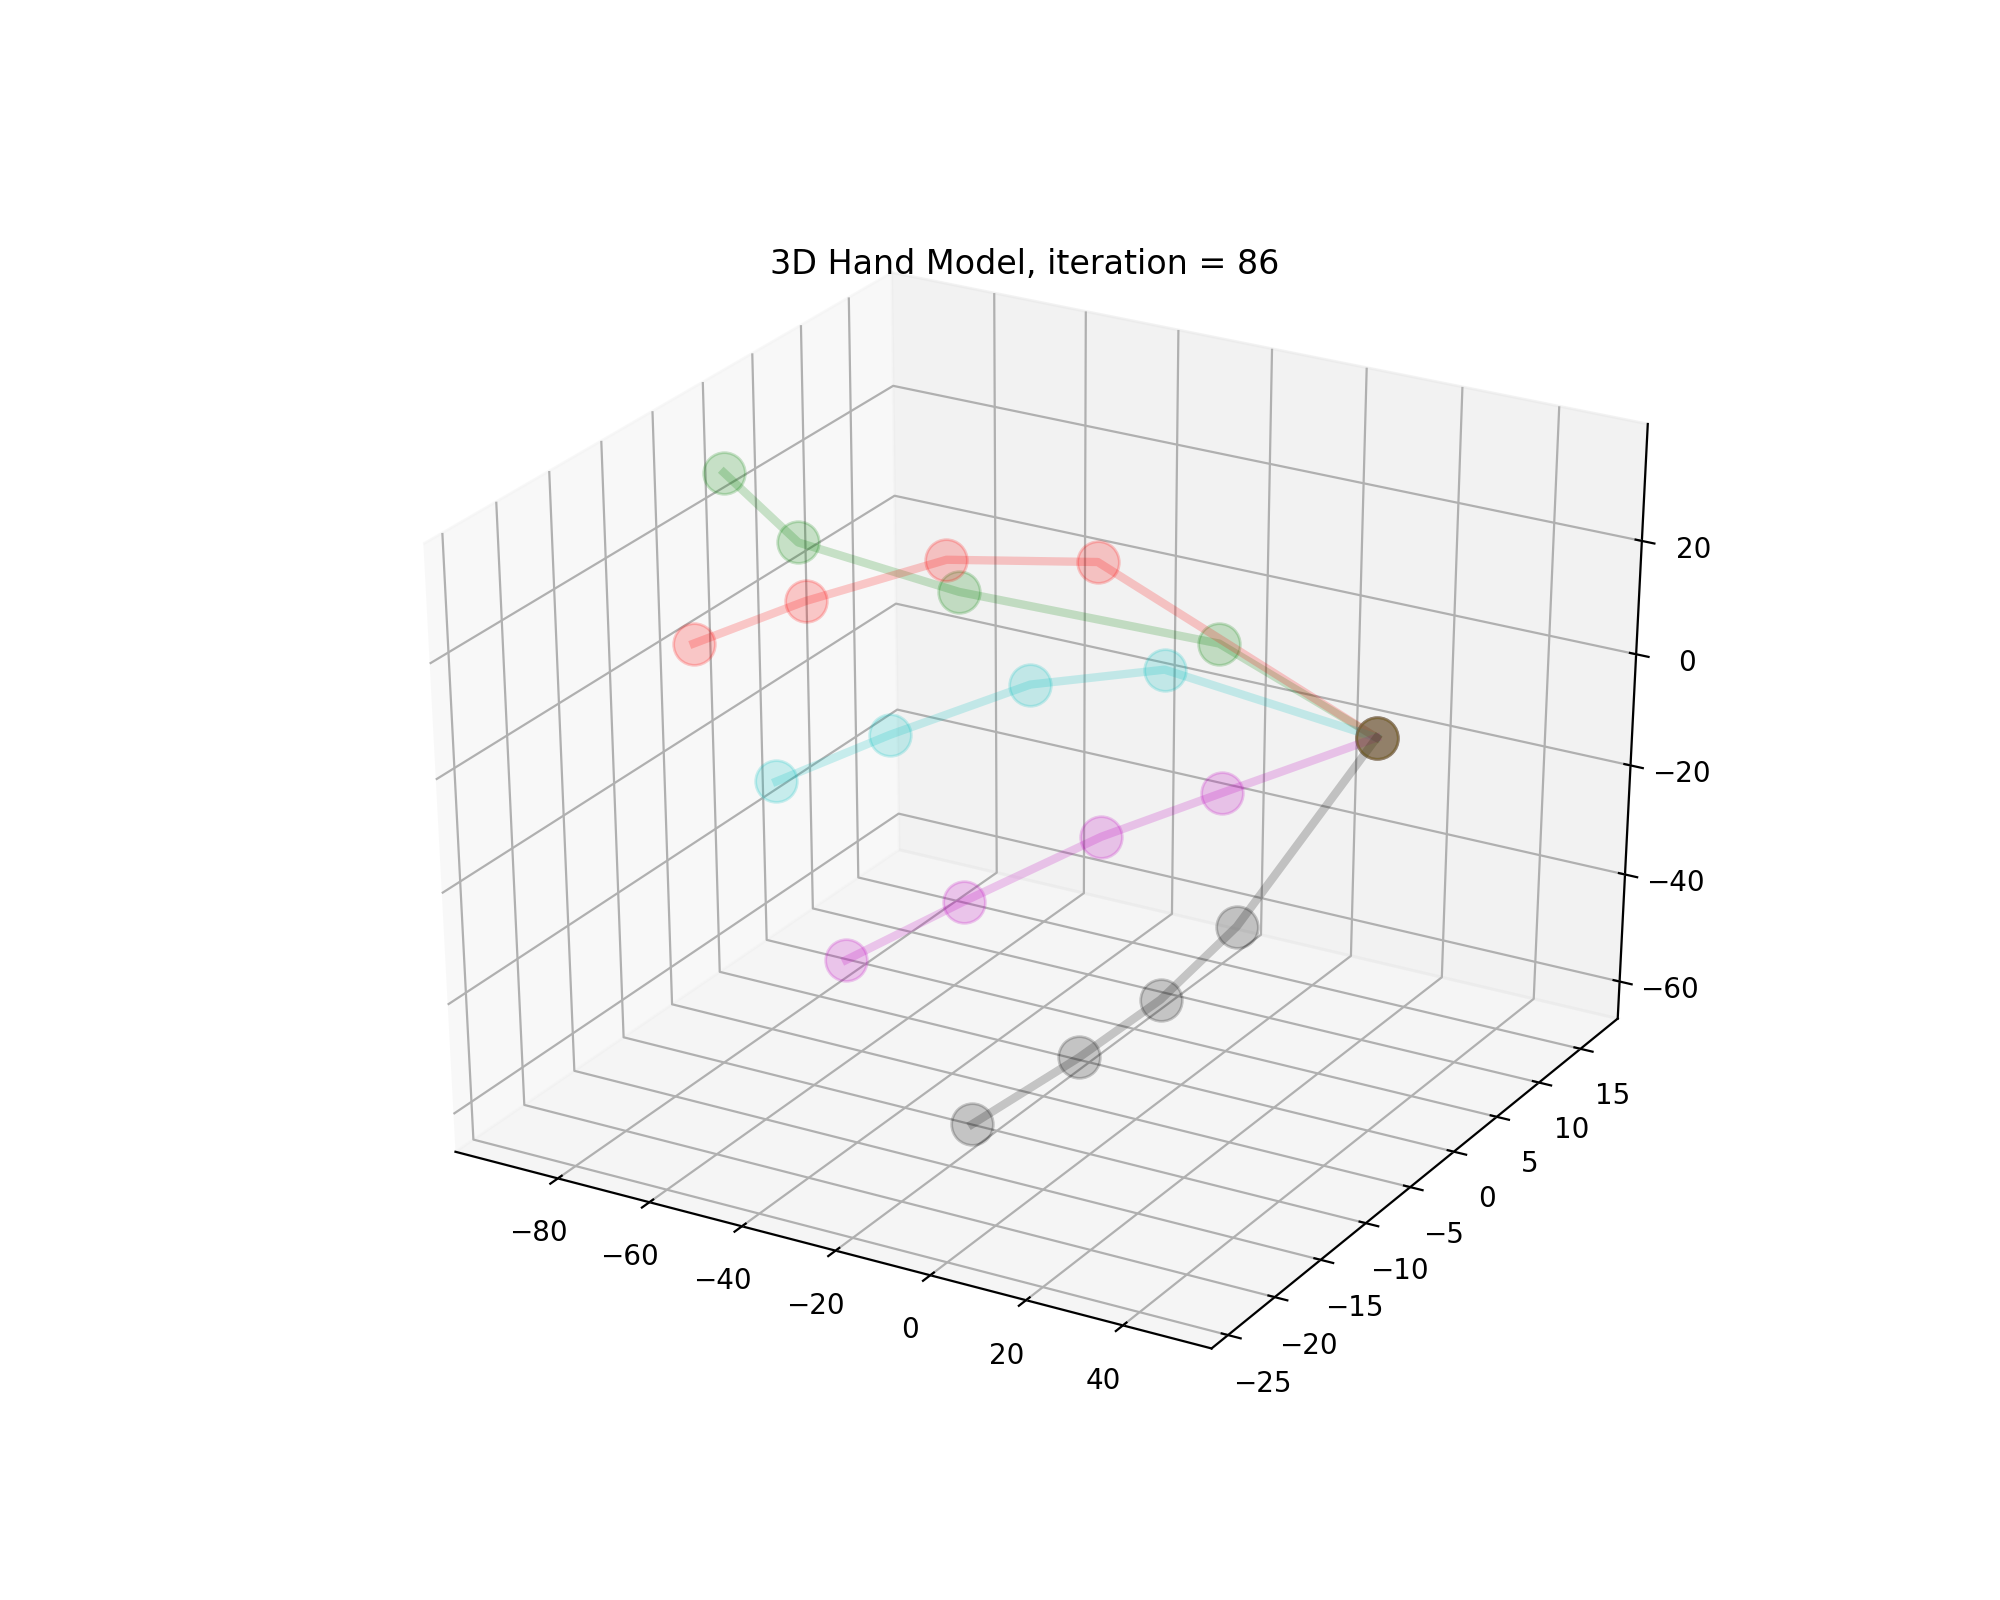

In [18]:
%matplotlib notebook

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['g', 'r', 'c', 'm', 'k']
title = ax.set_title('3D Hand Model')


mod_df = mod_dataframe(plot_df[:1])
pred_mod_df = mod_dataframe(pred_plot_df[:1])
columns = mod_df.columns
j = 0
line = []
pred_line = []
for i in range(0, 15, 3):
    a = mod_df[columns[i]].values
    b = mod_df[columns[i+1]].values
    c = mod_df[columns[i+2]].values
    pred_a = pred_mod_df[columns[i]].values
    pred_b = pred_mod_df[columns[i+1]].values
    pred_c = pred_mod_df[columns[i+2]].values
    #add labels
#     l, = ax.plot(a, b, c, 'ro-', color=colors[j], marker="o", ms=15, lw=3)
    pred_l, = ax.plot(pred_a, pred_b, pred_c, 'ro-', color=colors[j], alpha=0.2, marker="o", ms=15, lw=3)
    #add labels
#     line.append(l)
    pred_line.append(pred_l)
    j += 1

# wrist, = ax.plot(a, b, c, 'ro-', color='y', marker="o", ms=15, lw=3)
pred_wrist, = ax.plot(pred_a, pred_b, pred_c, 'ro-', color='y', alpha=0.2, marker="o", ms=15, lw=3)
ani = FuncAnimation(fig, update, samples, interval=1, blit=True)
#ax.legend(['Thumb', 'Index', 'Middle', 'Ring', 'Pinky', 'Wrist'])
plt.show()

In [19]:
# %matplotlib notebook
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# colors = ['g', 'r', 'c', 'm', 'k']
# # alphas = [1, 0.7, 0.5, 0.3]

# for i in range(samples):
#     mod_df = mod_dataframe(plot_df[i:i+1])
#     columns = mod_df.columns
#     j = 0
#     for i in range(0, 15, 3):
#         a = mod_df[columns[i]].values
#         b = mod_df[columns[i+1]].values
#         c = mod_df[columns[i+2]].values
#         ax.scatter(a, b, c, color=colors[j], s=100)
#         ax.plot(a, b, c, color=colors[j])
#         j += 1

# #animation = FuncAnimation(fig, update, interval=200)
# plt.show()

In [20]:
# def iterate_dataframe(plot_df):
#     for col in plot_df:
#         yield plot_df[col].values

In [21]:
# %matplotlib notebook
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# generator = iterate_dataframe(plot_df)
# ax.scatter(next(generator), next(generator), next(generator), color='b')
# colors = ['g', 'r', 'c', 'm', 'k']
# alphas = [1, 0.7, 0.5, 0.3]
# k = 0
# j = -1
# for i in range(20):
#     if (i % 4 == 0):
#         k = 0
#         j += 1
#     a = next(generator)
#     b = next(generator)
#     c = next(generator)
#     ax.scatter(a, b, c, color=colors[j], alpha=alphas[k])
#     ax.plot(a, b, c, color=colors[j])
#     plt.pause(0.05)
#     k += 1

# ax.legend(['Wrist ', 'Thumb Proximal', 'Thumb Intermediate', 'Thumb Distal', 'Thumb Tip',
#            'Index Proximal', 'Index Intermediate', 'Index Distal', 'Index Tip',
#            'Middle Proximal', 'Middle Intermediate', 'Middle Distal', 'Middle Tip',
#            'Ring Proximal', 'Ring Intermediate', 'Ring Distal', 'Ring Tip',
#            'Pinky Proximal', 'Pinky Intermediate', 'Pinky Distal', 'Pinky Tip'])
# plt.show()